# Import Libraries

In [40]:
pip uninstall statsmodels

Found existing installation: statsmodels 0.13.1
Uninstalling statsmodels-0.13.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.13.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.13.1


In [41]:
!pip install statsmodels


  Using cached statsmodels-0.13.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

## Read the data

In [2]:
data=pd.read_csv('ElectricProduction.csv', index_col = 0)
data.head()

,IPG2211A2N
DATE,
1985-01-01,71.5803
1985-02-01,69.7765
1985-03-01,61.6718
1985-04-01,56.7450
1985-05-01,54.6184


#Convert Date column as index

In [3]:
data.index = pd.to_datetime(data.index)

#Change the name of the variable to Energy Production for ease of understanding

In [4]:
data.columns = ['Energy Production']

#Plot the data

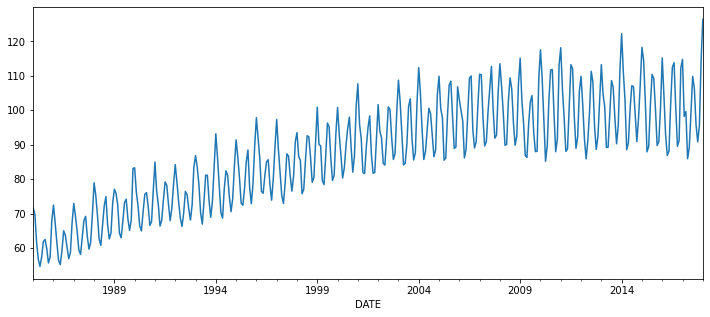

In [5]:
data['Energy Production'].plot(figsize=(12,5))

#Decompose the data into components

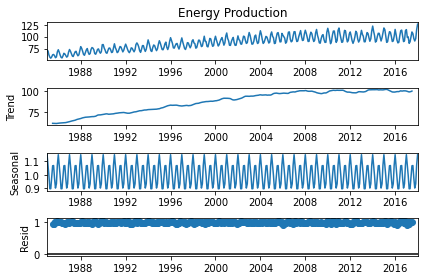

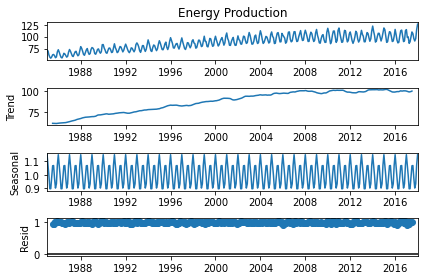

In [6]:
# ETS Decomposition
result = seasonal_decompose(data['Energy Production'], 
                            model ='multiplicative')
  
# ETS plot 
result.plot()

#Stationarity Test

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
adfuller(data['Energy Production'])

(-2.3013045929606744,
 0.17154755955102052,
 15,
 381,
 {'1%': -3.4476305904172904,
  '10%': -2.570827146203181,
  '5%': -2.869155980820355},
 1838.3598201812765)

#The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

In [9]:
!pip install pmdarima

In [10]:
from statsmodels.compat.pandas import Appender

In [11]:
import pmdarima as pm

In [12]:
from pmdarima import auto_arima

In [13]:
stepwise_fit = auto_arima(data['Energy Production'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2101.666, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2746.141, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2688.747, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2622.321, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2744.268, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2490.314, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2234.385, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2091.470, Time=1.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2447.067, Time=0.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2103.628, Time=1.20 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2057.195, Time=1.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2429.491, Time=0.66 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2069.108, Time=1.40 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : 

In [14]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1020.597
Date:                Sat, 08 Jan 2022   AIC                           2057.195
Time:                        06:35:44   BIC                           2089.046
Sample:                             0   HQIC                          2069.813
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1072      0.024      4.444      0.000       0.060       0.154
ar.L1          0.9985      0.002    517.222      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -803.744      0.000      -1.002      -0.997
ma.L1         -1.3663      0.038    -35.634      0.000      -1.441      -1.291
ma.L2          0.9308      0.071     13.031      0.000       0.791       1.071
ma.L3          0.0037      0.071      0.051      0.959      -0.136       0.144
ma.L4         -0.4321      0.041    -10.457      0.000      -0.513      -0.351
sigma2         9.9048      0.635     15.598      0.000       8.660      11.149
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):                23.02
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#We’ll train from the years 1985–2016 and test our forecast on the years after that and compare it to the real data:

In [15]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [16]:
print(train.shape,test.shape)

(384, 1) (13, 1)


# Fit ARIMA model to the train dataset

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
model = SARIMAX(train['Energy Production'], 
                order = (2, 1, 4))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [19]:
result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Energy Production   No. Observations:                  384
Model:               SARIMAX(2, 1, 4)   Log Likelihood                -980.100
Date:                Sat, 08 Jan 2022   AIC                           1974.199
Time:                        06:36:04   BIC                           2001.835
Sample:                    01-01-1985   HQIC                          1985.162
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9979      0.002    423.609      0.000       0.993       1.003
ar.L2         -0.9984      0.002   -545.342      0.000      -1.002      -0.995
ma.L1         -1.3008      0.047    -27.504      0.000      -1.393      -1.208
ma.L2          0.9215      0.087     10.568      0.000       0.751       1.092
ma.L3          0.0191      0.090      0.213      0.832      -0.157       0.195
ma.L4         -0.3885      0.057     -6.859      0.000      -0.500      -0.278
sigma2         9.6589      0.656     14.723      0.000       8.373      10.945
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                23.12
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Predictions of ARIMA model against the test set

In [20]:
start = len(train)
end = len(train) + len(test) - 1

In [21]:
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  

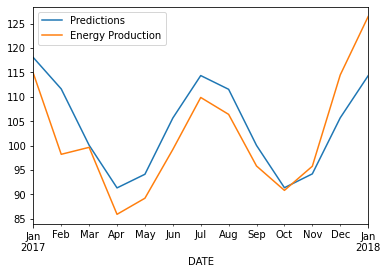

In [22]:
# plot predictions and actual values
predictions.plot(legend = True)
test['Energy Production'].plot(legend = True)

#Evaluate the model using MSE and RMSE

In [23]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [24]:
rmse(test["Energy Production"], predictions)

6.65423088289687

In [25]:
mean_squared_error(test["Energy Production"], predictions)

44.27878864289846

#Forecast using ARIMA Model

In [26]:
model = model = SARIMAX(data['Energy Production'], 
                        order = (2, 1, 4))
result = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


#Forecast for the next 3 years

In [27]:
forecast = result.predict(start = len(data), 
                          end = (len(data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')

## Plot the forecast values

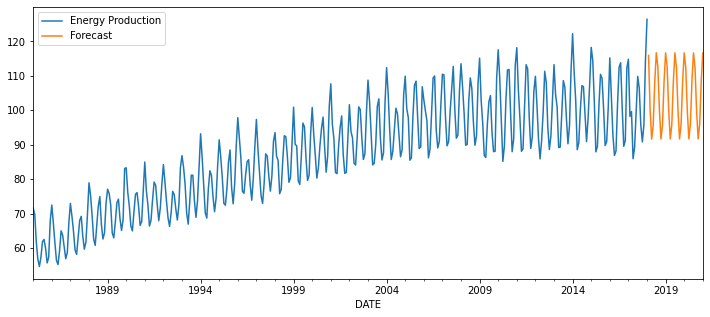

In [28]:
data['Energy Production'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)